# CS 210 -- Data Management For Data Science 

Final Project, Preliminary Analysis 

Group Members: Nilay Tripathi, Nikhil Munagala, Arnav Borborah, Ajay Anand

In [1]:
from collections import Counter
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt 

## Information About The Data Set

Our data set is "Jobs And Salaries In Data Science", which gives information about salaries in careers related to data science (e.g. data scientist, data architect, machine learning engineer, etc.). The data set was obtained from Kaggle and can be found [here](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data). 

Here is a brief summary of the meanings of the columns

- `work_year`: year the data was recorded.
- `job_title`: the specific title of the job.
- `job_category`: specialized category of the job (data science, analyst, machine learning etc.). More descriptive.
- `salary_currency`: currency the salary is reported in
- `salary`: annual salary, in the currency specified by the `salary_currency` column.
- `salary_in_usd`: salary converted to USD
- `employee_residence`: employee's country of residence
- `experience_level`: employee's experience level (entry-level, mid-level, etc)
- `employment_type`: full-time, part-time, contract work, etc.
- `work_setting`: working environment (remote, in-person, hybrid, etc)
- `company_location`: country of company
- `company_size`: relative size of companies (S for Small, M for Medium, etc)

Data science and its related fields play an extremely crucial role in today's society, where machine learning and artificial intelligence play increasingly important role. This data set includes data on time, allowing us to analyze trends in data science salary (and consequently, demand) over time. We can also use this data to learn how other information regarding experience, company size, and location impact salaries in data science and its related fields. Finally, there are tons of subfields within data science (like data analyst, data engineer, machine learning engineer, etc.) and as students who are interested in careers in data science, we would like to investigate how the subtle differences between these job titles impacts salary and future potential. 

## Preliminary Analysis Of Data

In this section, we import the data and try to learn about its columns and the types of data which are being stored.

In [2]:
dat = pd.read_csv("jobs_in_data.csv")

In [3]:
# Peek at the data 
dat.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


We first gather some preliminary information about the data and the types involved. For this purpose, we use the pandas `info()` function.

In [4]:
# Preliminary info 
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


The first line indicates that there are 9,355 observations in the data frame. We see that the data records 12 features in the data. From the output below, we see that there are no NA values in our data set. When looking at data types, we see that only `work_year` and the variables recording salaries are numerical while everything else is a string type (denoted in pandas as type "object").

Next, we would like to investigate preliminary descriptive statistics to learn about the data set and begin to formulate hypotheses about it. We will use the pandas `describe()` function to obtain the preliminary statistics. 

Note that we only report the `salary_in_usd` variable: the statistics for `work_year` are meaningless (since this variable records time) and the `salary` variable records values with different currencies, making it inconsistent for comparisons.

In [5]:
# Preliminary statistics 
dat["salary_in_usd"].describe()

count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

### Preliminary Investigation Of Categorical Types

Several variables in our data set are strings (labeled as type "object" by pandas). We need to be able to extract relevant information about the job title and category given the large variety in strings of this type. 

In [6]:
# Number of unique jobtitles and categories
dat["job_title"].nunique()

125

In [7]:
dat["job_category"].nunique()

10

### Preliminary Plotting

To quickly learn about the relationships among the numerical variable, we will make use of graphs. They can help us quickly assess the quality and behavior of our numerical variables. 

First, we want to analyze the distributions of the salary variable. We will restrict our attention to the `salary_in_usd` column, since the regular `salary` column records its values with inconsistent units. A box plot will show us the overall skewness of the data. 

We first want to assess the overall distribution of the salary (recorded in USD). To do this, we generate a box plot and histogram of the `salary_in_usd` variable. 

(array([ 507., 1631., 2719., 2195., 1356.,  588.,  242.,   77.,   34.,
           6.]),
 array([ 15000.,  58500., 102000., 145500., 189000., 232500., 276000.,
        319500., 363000., 406500., 450000.]),
 <BarContainer object of 10 artists>)

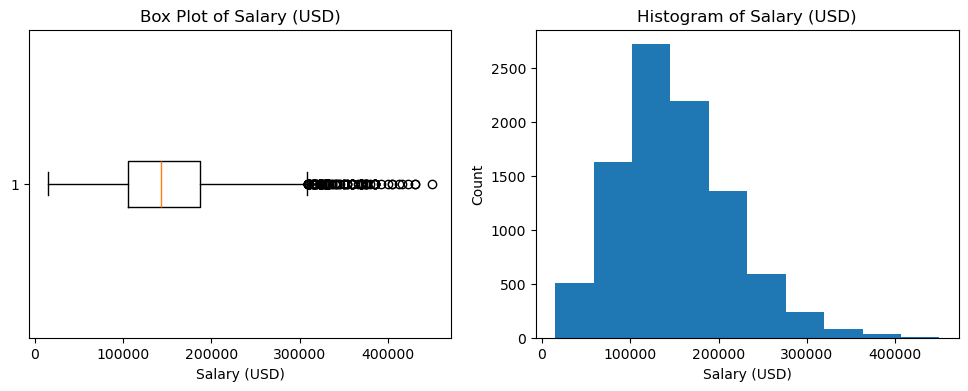

In [10]:
# Use a subplot to show both figures side by side for easy comparison.
sal_fig, x = plt.subplots(1,2, figsize = (12,4)) 

x[0].set_title("Box Plot of Salary (USD)")
x[0].set_xlabel("Salary (USD)")
x[0].boxplot(dat['salary_in_usd'], vert = False)

x[1].set_title("Histogram of Salary (USD)") 
x[1].set_xlabel("Salary (USD)") 
x[1].set_ylabel("Count")
x[1].hist(dat['salary_in_usd'])

The box plot indicates several potential outliers in the data (indicated by the circles on the right hand tail of the plot). This is also indicated on the histogram by the presence of a tail, indicating an overall right-skewed distribution. 

Both of these observations indicate that there are extreme values of salary on the higher end i.e. that there are a small subset of individuals who make substantially more than the median income for this field. Investigating this is an avenue for further investigation.

## Filtering Out Common Keywords

We would like to see how the job title impacts the salary in the outlier group, and compare it to the no outliers group. However, there are many unique job titles and it would be impractical to search through all of them. 

Instead, we search for specific "buzz words" in the job titles. We expect words like "data", "machine learing", "AI", and "artifical intelligence" to be in all the job titles. We suspect, however, that modifiers like "engineer", "architect", "scientist", "developer", etc. will have an impact on the salary. Thus, we simply filter common words out and leave only these "buzz words".

In [11]:
# Common words to filter out 
words_rem = ["machine", "learning", "ml", "data", "ai", "artificial",  "intelligence", "analytics", "deep", "of"]

In [12]:
# Remove the words from the list case insensitive
def remove_common_words (title):
    words = ''
    for word in title.split():
        words = ','.join([i for i in title.split() if i.lower() not in words_rem])
    return words

In [13]:
dat["job_title_keywords"] = dat["job_title"].apply(remove_common_words)

## Analysis Of Outliers

As indicated above, there are several outliers present in the data set. We would like to see what patterns lead to such a high salary. 

We will first gather all the outliers, which are computed using the 1.5*IQR rule. The interquartile range (IQR) is first computed as $$\text{IQR} = \text{upper quartile} - \text{lower quartile}$$The cutoff for an outlier is then given as $$\text{min} = \text{upper quartile} + 1.5 \times \text{IQR}$$

In [14]:
# Use the 1.5 * IQR to get the outliers 
lower_quartile = np.quantile(dat["salary_in_usd"], 0.25)
upper_quartile = np.quantile(dat["salary_in_usd"], 0.75) 
IQR = upper_quartile - lower_quartile

In [15]:
# Lower cutoff for the outliers 
low = upper_quartile + 1.5 * IQR 

In [67]:
# Get the outliers from the data set 
outliers = dat[dat["salary_in_usd"] > low]
wo_outliers = dat[dat["salary_in_usd"] <= low]

We will now gather some basic information on the outliers using the `describe()` function from pandas.

In [17]:
outliers["salary_in_usd"].describe()

count       158.000000
mean     341917.436709
std       30203.875365
min      309000.000000
25%      318475.000000
50%      331640.000000
75%      364222.500000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [18]:
wo_outliers["salary_in_usd"].describe()

count      9197.000000
mean     147007.592258
std       58332.569893
min       15000.000000
25%      105000.000000
50%      142200.000000
75%      185000.000000
max      308000.000000
Name: salary_in_usd, dtype: float64

### A Brief Lexical Comparison Between The Two Sets

As stated above, we would like to see if we can observe common trends among salary from the job title alone. We conduct a lexical comparison, where we try to isolate specific keywords in the job title and see if there are patterns that explain the high salaries in the outlier set.

In [19]:
# We now want to count the number of each word in the outlier set and the no outlier set. 
outlier_words = {} 
no_outlier_words = {}

In [20]:
for words in outliers["job_title_keywords"]:
    word_list = words.split(',')
    for word in word_list:
        if word not in outlier_words:
            outlier_words[word] = 1 
        else:
            outlier_words[word] += 1
            
for words in wo_outliers["job_title_keywords"]:
    word_list = words.split(',')
    for word in word_list:
        if word not in no_outlier_words:
            no_outlier_words[word] = 1 
        else:
            no_outlier_words[word] += 1

We now use the counts in the dictionary to create a data frame in which we compare the counts of each word in the outlier dictionaries. 

In [54]:
word_counts_outliers = pd.DataFrame.from_dict(outlier_words, orient="index", columns=["word_count_outlier"]) 
word_counts_outliers["word"] = word_counts_outliers.index
word_counts_outliers.head()

,word_count_outlier,word
Engineer,78,Engineer
Research,17,Research
Scientist,51,Scientist
Architect,8,Architect
Director,5,Director


In [53]:
word_counts_no_outliers = pd.DataFrame.from_dict(no_outlier_words, orient="index", columns=["word_count_no_outlier"]) 
word_counts_no_outliers["word"] = word_counts_no_outliers.index
word_counts_no_outliers.head()

,word_count_no_outlier,word
DevOps,2,DevOps
Engineer,4012,Engineer
Architect,221,Architect
Scientist,2656,Scientist
Researcher,18,Researcher


We now join the two word count data frames into one so we can easily compare them.

In [44]:
# Join the two data frames together using the word variable
word_counts = pd.concat([word_counts_no_outliers, word_counts_outliers], axis = 1, join = "outer", ignore_index=True)

# Drop the last column
word_counts = word_counts.drop([3], axis = 1) 

# Rename columns 
word_counts = word_counts.rename(columns = {0 : "no_outlier_count", 1 : "word", 2 : "outlier_count"})

# Fill NAs with 0 to indicate no presence 
word_counts = word_counts.fillna(0) 
word_counts.head()

,no_outlier_count,word,outlier_count
DevOps,2.0,DevOps,0.0
Engineer,4012.0,Engineer,78.0
Architect,221.0,Architect,8.0
Scientist,2656.0,Scientist,51.0
Researcher,18.0,Researcher,0.0


We notice that there are sufficiently more non-outliers than outliers, so we cannot simply do a comparison by numbers. It is more accurate to compare proportions. We compute the proportion of titles which contain each word.

In [56]:
word_counts["outlier_prop"] = word_counts["outlier_count"]/(outliers.shape[0])
word_counts["no_outlier_prop"] = word_counts["no_outlier_count"]/(wo_outliers.shape[0])
word_counts["prop_diff"] = word_counts["outlier_prop"] - word_counts["no_outlier_prop"]
word_counts.head()

,no_outlier_count,word,outlier_count,outlier_prop,no_outlier_prop,prop_diff
DevOps,2.0,DevOps,0.0,0.000000,0.000217,-0.000217
Engineer,4012.0,Engineer,78.0,0.493671,0.436229,0.057442
Architect,221.0,Architect,8.0,0.050633,0.024030,0.026603
Scientist,2656.0,Scientist,51.0,0.322785,0.288790,0.033995
Researcher,18.0,Researcher,0.0,0.000000,0.001957,-0.001957


In the code above, we calculate the difference in the proportion between the proportion in the outlier set and no outlier sets, with negative values indicating a larger percentage in the no outlier set. If we sort the data frame by the difference in proportion, we can see the words which have the most drastic difference among the outliers and no outlier set.

In [64]:
top_words = word_counts.sort_values(by = ['prop_diff'], key = abs, ascending=False).head(10)
top_words

,no_outlier_count,word,outlier_count,outlier_prop,no_outlier_prop,prop_diff
Analyst,1609.0,Analyst,4.0,0.025316,0.174948,-0.149632
Research,443.0,Research,17.0,0.107595,0.048168,0.059427
Engineer,4012.0,Engineer,78.0,0.493671,0.436229,0.057442
Head,39.0,Head,7.0,0.044304,0.004241,0.040063
Scientist,2656.0,Scientist,51.0,0.322785,0.288790,0.033995
Science,213.0,Science,9.0,0.056962,0.023160,0.033802
Applied,288.0,Applied,10.0,0.063291,0.031315,0.031977
Director,29.0,Director,5.0,0.031646,0.003153,0.028492
Architect,221.0,Architect,8.0,0.050633,0.024030,0.026603
Business,241.0,Business,0.0,0.000000,0.026204,-0.026204


Recall that negative values correspond to a larger proportion in the no outlier set. From the table above, we see that the word "analyst" is more prevalent among job titles in the no outlier set than the outlier set, implying that jobs with "analyst" in the title are likely more entry-level positions. 

On the contrary, we see that words like "research", "engineer", and "head" are more prevalent among the outlier salaries and thus lead to larger salaries. This matches our prediction, since these are more specalized roles that require more experience and would cosnequently yield a higher salary. The word "head" also denotes a more senior position, which would indicate more pay. 

Interestingly, this analysis does not reveal any large difference between roles with specific certification requirelemts (i.e. like AWS positions). We thought that these extra qualifications would cause a higher salary, but this is not supported by the data. A possible reason could be the relatively few job titles with these roles, meaning there might not be enough data to reach an accurate conclusion on this aspect.

### Other Variables Influencing Outliers 

In this section, we analyze the patterns among the other variables and their patterns among the other variable across the outlier and no-outlier sets.

In [68]:
# First, assess the experience level of the position. 
print("Unique experience levels in the no outlier set:", wo_outliers["experience_level"].unique())
print("Unique experience levels in the outlier set:", outliers["experience_level"].unique())

Unique experience levels in the no outlier set: ['Mid-level' 'Senior' 'Executive' 'Entry-level']
Unique experience levels in the outlier set: ['Senior' 'Mid-level' 'Executive']


From this brief analysis, we notice that entry-level positions are completely absent from the outlier set, confirming our suspicion that extremely high salaries are only really seen in more experienced positions. It is a bit surprising to see "mid-level" positions in this category, but this term is subjective and can vary greatly across fields and companies.

In [72]:
# We compare the different job categories across the two sets 
outliers["job_category"].value_counts(normalize=True)

Data Science and Research         0.405063
Machine Learning and AI           0.379747
Data Engineering                  0.107595
Leadership and Management         0.056962
Data Architecture and Modeling    0.025316
Data Analysis                     0.025316
Name: job_category, dtype: float64

<BarContainer object of 6 artists>

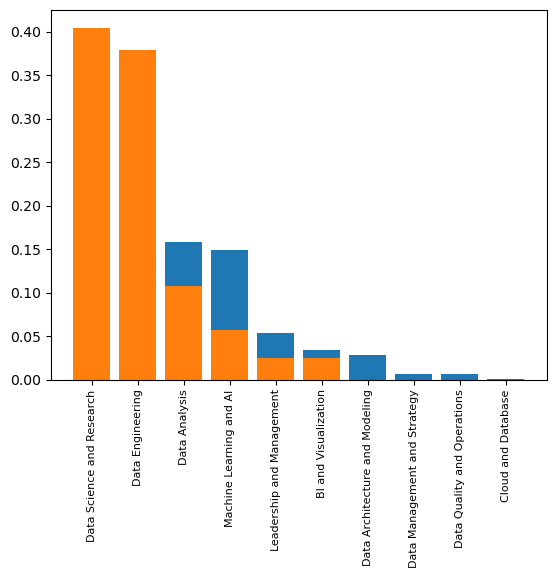

In [83]:
# Proportions for the job category in the no outlier set 
no_outliers_props = wo_outliers["job_category"].value_counts(normalize=True) 
plt.bar(range(len(no_outliers_props)), no_outliers_props, label = "Non-Outlier") 
plt.xticks(range(len(no_outliers_props)), no_outliers_props.index, rotation='vertical', fontsize=8)

outliers_props = outliers["job_category"].value_counts(normalize=True) 
plt.bar(range(len(outliers_props)), outliers_props, label = "Outlier")